In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
data = 'data/batting_npb2021.csv'
df = pd.read_csv(data, sep=',', skiprows=0, header=0)

In [4]:
print(df.shape)
print(df.info())
display(df.head())

(61, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Height     61 non-null     int64
 1   Weight     61 non-null     int64
 2   HomeRun    61 non-null     int64
 3   StrikeOut  61 non-null     int64
 4   Steal      61 non-null     int64
dtypes: int64(5)
memory usage: 2.5 KB
None


,Height,Weight,HomeRun,StrikeOut,Steal
0,173,85,21,26,0
1,170,85,11,65,5
2,190,104,32,116,3
3,188,87,28,122,6
4,171,85,11,84,4


### 説明変数と目的変数を分ける

In [5]:
X = df[ ['Weight'] ] ## 説明変数 x  ## 2次元データ
y = df[ 'HomeRun' ] ## 目的変数 y
print(X.shape)
display(X.head())
print(y.shape)
display(y.head())

(61, 1)


,Weight
0,85
1,85
2,104
3,87
4,85


(61,)


0    21
1    11
2    32
3    28
4    11
Name: HomeRun, dtype: int64

In [6]:
X_C = sm.add_constant(X) ## 全てが1の列を追加
display(X_C.head())

,const,Weight
0,1.0,85
1,1.0,85
2,1.0,104
3,1.0,87
4,1.0,85


### 回帰モデルの作成

In [7]:
model = sm.OLS(y, X_C) ## モデルにテータを与える
result = model.fit() ## モデルを計算する
print(result.summary()) ## 計算結果を表示

                            OLS Regression Results                            
Dep. Variable:                HomeRun   R-squared:                       0.315
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     27.18
Date:                Mon, 16 Jun 2025   Prob (F-statistic):           2.49e-06
Time:                        11:37:18   Log-Likelihood:                -214.81
No. Observations:                  61   AIC:                             433.6
Df Residuals:                      59   BIC:                             437.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -32.2835      9.003     -3.586      0.0

### 特に重要な値を表示

In [8]:
print('決定係数:', result.rsquared)
print('自由度調整済み決定係数:', result.rsquared_adj)
print(result.params) ## 回帰係数

決定係数: 0.315425157809346
自由度調整済み決定係数: 0.3038221943823858
const    -32.283543
Weight     0.550493
dtype: float64


y(HomeRun) = -32.284 + 0.550 * x(Weight)  
つまり、体重が１kg増えるとホームランは0.550本増えると分析できる

### 回帰直線の図示

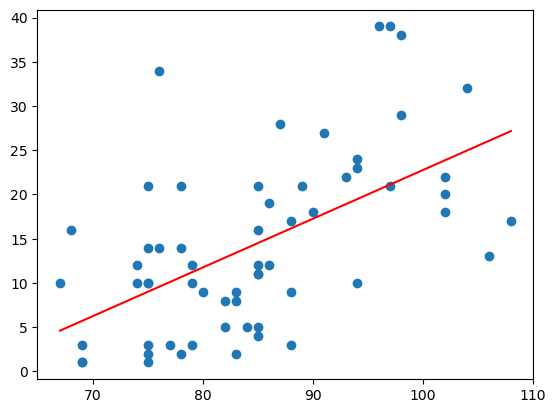

In [9]:
## 回帰直線の計算
a0 = result.params['const'] ## 切片 -32.283543
a1 = result.params['Weight'] ## 傾き 0.550493
x_min = X['Weight'].min() ## Weightの最小値 67
x_max = X['Weight'].max() ## Weightの最大値 108

x_min_max = np.array([x_min, x_max]) ## 最小値と最大値を配列に格納 [67, 108]
y_min_max = a0 + a1 * x_min_max ## 回帰直線の計算 [ 4.59948515 27.16969631]

## 図示
plt.scatter(X['Weight'], y) ## 散布図
plt.plot(x_min_max, y_min_max, c='red') ## 回帰直線

### 得られたモデルを用いて具体的な予測を行う

In [10]:
x_test = np.array([ 70.0, 85.0, 100.0 ]) ## 70kg、85kg、100kgの選手を準備
y_test = a0 + a1 * x_test ## 回帰直線の計算
print(y_test)

[ 6.25096402 14.50835835 22.76575267]


70kg、85kg、100kgの選手はそれぞれ6.3本、14.5本、22.8本のホームランを打つと予測できる